In [ ]:
from google.colab import drive

drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import matplotlib
import datetime
import missingno as msno
from sklearn.impute import KNNImputer

from pandas.plotting import lag_plot, autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.stattools import adfuller, acf, pacf,arma_order_select_ic

In [ ]:
df= pd.read_csv('/content/gdrive/MyDrive/Dataset/city_day.csv',parse_dates=True).sort_values(by = ['Date'])

EDA

In [ ]:
df.tail(5)

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
25167,Talcher,2020-05-01,17.95,NaN,8.79,19.49,28.29,3.33,1.75,NaN,24.34,0.00,NaN,NaN,101.0,Moderate
2889,Amaravati,2020-05-01,39.00,55.00,1.33,5.60,4.07,6.53,NaN,27.10,28.60,0.10,0.45,NaN,54.0,Satisfactory
1999,Aizawl,2020-05-01,NaN,NaN,11.58,0.03,15.19,13.42,0.25,5.91,NaN,0.05,0.67,NaN,20.0,Good
22257,Mumbai,2020-05-01,13.08,42.50,16.95,5.22,21.04,5.11,0.32,16.97,16.30,5.04,NaN,NaN,64.0,Satisfactory
26218,Thiruvananthapuram,2020-05-01,17.58,37.49,2.56,7.84,9.34,4.85,0.45,7.10,31.16,NaN,NaN,NaN,82.0,Satisfactory


In [ ]:
df.isnull().sum()

City              0
Date              0
PM2.5          4289
PM10          10766
NO             3233
NO2            3217
NOx            4043
NH3            9847
CO             1961
SO2            3544
O3             3660
Benzene        5287
Toluene        7555
Xylene        16807
AQI            4282
AQI_Bucket     4282
dtype: int64

In [ ]:
df['PM2.5']=df['PM2.5'].fillna((df['PM2.5'].median()))
df['PM10']=df['PM10'].fillna((df['PM10'].median()))
df['NO']=df['NO'].fillna((df['NO'].median()))
df['NO2']=df['NO2'].fillna((df['NO2'].median()))
df['NOx']=df['NOx'].fillna((df['NOx'].median()))
df['NH3']=df['NH3'].fillna((df['NH3'].median()))
df['CO']=df['CO'].fillna((df['CO'].median()))
df['SO2']=df['SO2'].fillna((df['SO2'].median()))
df['O3']=df['O3'].fillna((df['O3'].median()))
df['Benzene']=df['Benzene'].fillna((df['Benzene'].median()))
df['Toluene']=df['Toluene'].fillna((df['Toluene'].median()))
df['Xylene']=df['Xylene'].fillna((df['Xylene'].median()))
df['AQI']=df['AQI'].fillna((df['AQI'].median()))

In [ ]:
df.isnull().sum()

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI              0
AQI_Bucket    4282
dtype: int64

In [ ]:
# printing the data for Chennai
Chennai= df.loc[df['City'] == 'Chennai']
Chennai['Date']= pd.to_datetime(Chennai['Date'])
Chennai.set_index('Date', inplace=True)


<ipython-input-8-4c609f6982e5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chennai['Date']= pd.to_datetime(Chennai['Date'])


In [ ]:
# printing the data for Bangalore
Bangalore= df.loc[df['City'] == 'Bengaluru']
Bangalore['Date']= pd.to_datetime(Bangalore['Date'])
Bangalore.set_index('Date', inplace=True)

<ipython-input-9-33cab4369d2e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bangalore['Date']= pd.to_datetime(Bangalore['Date'])


In [ ]:
# printing the data for Delhi
Delhi= df.loc[df['City'] == 'Delhi']
Delhi['Date']= pd.to_datetime(Delhi['Date'])
Delhi.set_index('Date', inplace=True)

<ipython-input-10-076ef7def964>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Delhi['Date']= pd.to_datetime(Delhi['Date'])


In [ ]:
# printing the data for Kolkata
Hyderabad= df.loc[df['City'] == 'Hyderabad']
Hyderabad['Date']= pd.to_datetime(Hyderabad['Date'])
Hyderabad.set_index('Date', inplace=True)


<ipython-input-11-fd24a6b302b5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Hyderabad['Date']= pd.to_datetime(Hyderabad['Date'])


In [ ]:
# printing the data for Mumbai
Mumbai= df.loc[df['City'] == 'Mumbai']
Mumbai['Date']= pd.to_datetime(Mumbai['Date'])
Mumbai.set_index('Date', inplace=True)


<ipython-input-12-f5cfcf3a0e7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mumbai['Date']= pd.to_datetime(Mumbai['Date'])


### **DATA PREPROCESSING**

In [ ]:
c =  ['City'  , 'Benzene' , 'Toluene', 'Xylene' ,'AQI_Bucket', 'PM10']
#Removing unneccesary columns
Mumbai.drop(c, axis=1, inplace=True)
Mumbai = Mumbai.sort_values('Date')
Mumbai=Mumbai[Mumbai.index >= '2016-01-01']

Bangalore.drop(c, axis=1, inplace=True)
Bangalore = Bangalore.sort_values('Date')
Bangalore=Bangalore[Bangalore.index >= '2016-01-01']

Chennai.drop(c, axis=1, inplace=True)
Chennai = Chennai.sort_values('Date')
Chennai=Chennai[Chennai.index >= '2016-01-01']

Delhi.drop(c, axis=1, inplace=True)
Delhi = Delhi.sort_values('Date')
Delhi=Delhi[Delhi.index >= '2016-01-01']

Hyderabad.drop(c, axis=1, inplace=True)
Hyderabad = Hyderabad.sort_values('Date')
Hyderabad=Hyderabad[Hyderabad.index >= '2016-01-01']


<ipython-input-13-03d30aef40ee>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Mumbai.drop(c, axis=1, inplace=True)
<ipython-input-13-03d30aef40ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Bangalore.drop(c, axis=1, inplace=True)
<ipython-input-13-03d30aef40ee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Chennai.drop(c, axis=1, inplace=True)
<ipython-input-13-03d30aef40ee>:15: SettingWithCopyWarning: 
A value is trying t

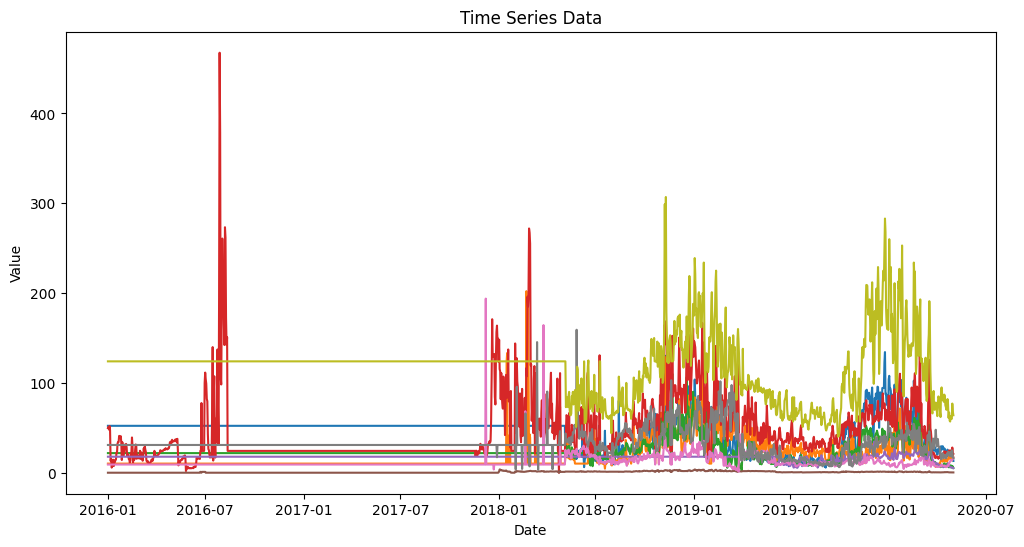

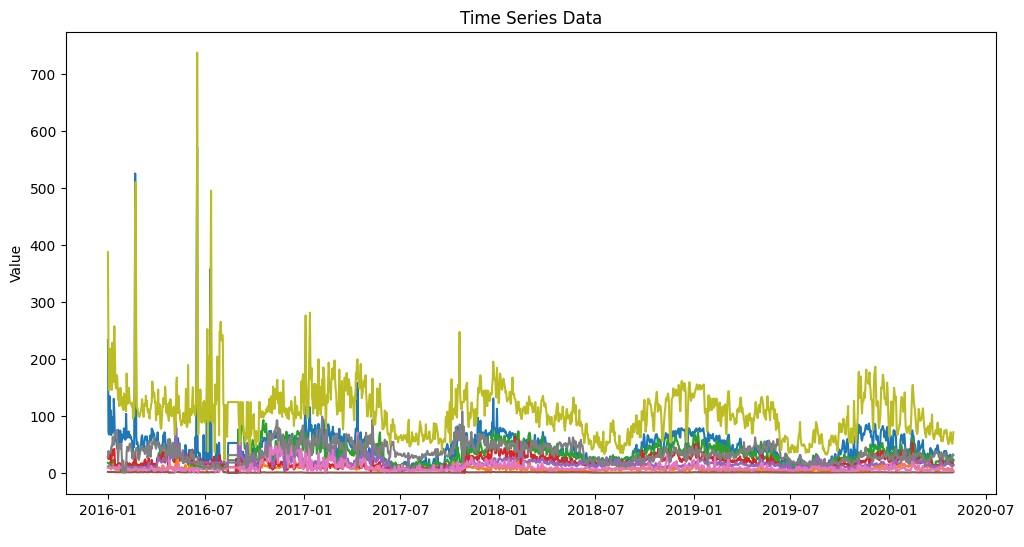

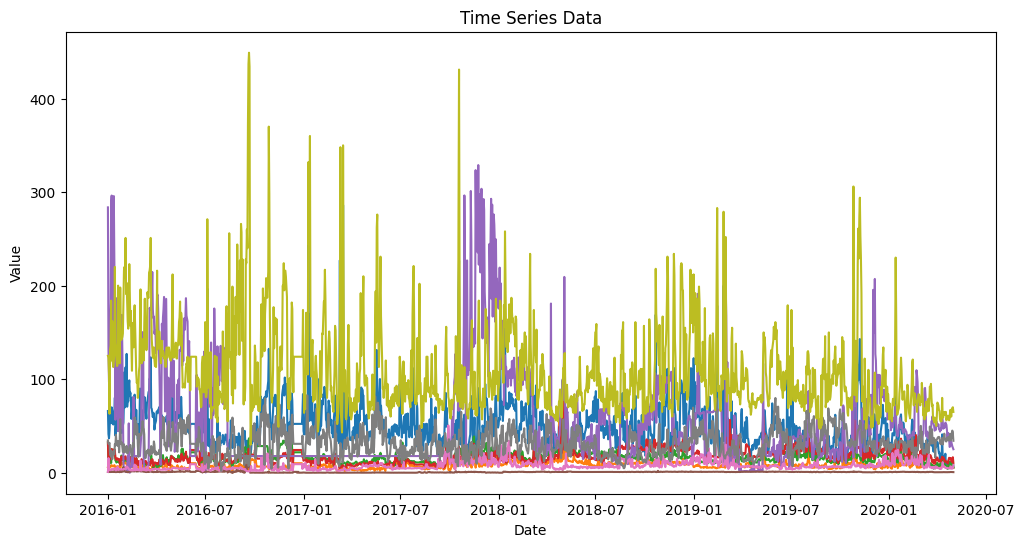

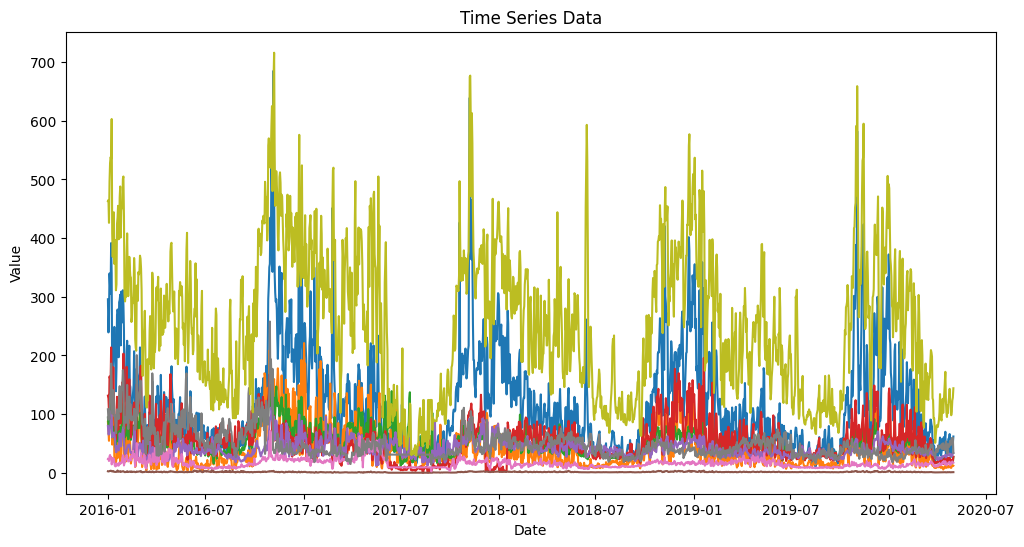

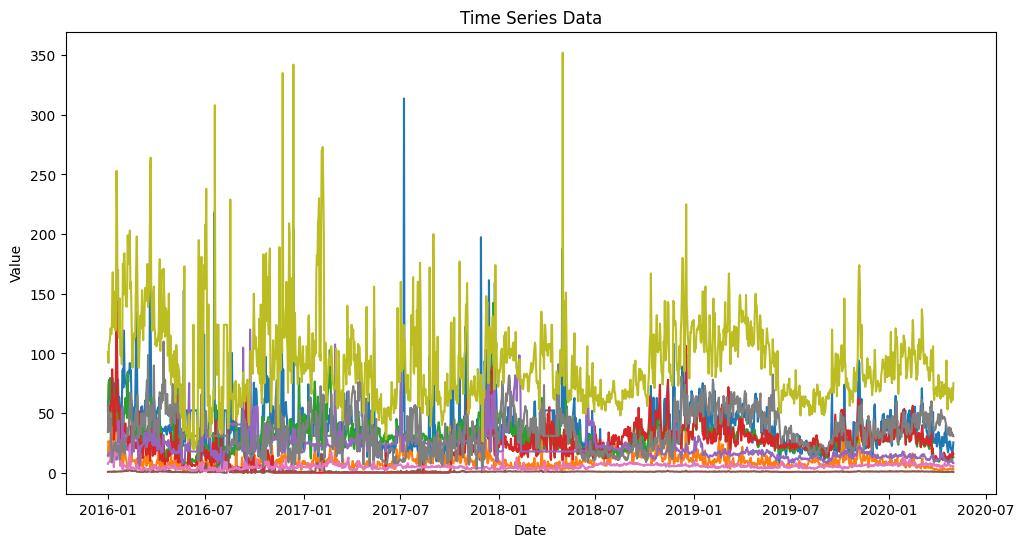

In [ ]:

plt.figure(figsize=(12, 6))
plt.plot(Mumbai)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(Hyderabad)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(Chennai)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(Delhi)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(Bangalore)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data')
plt.show()

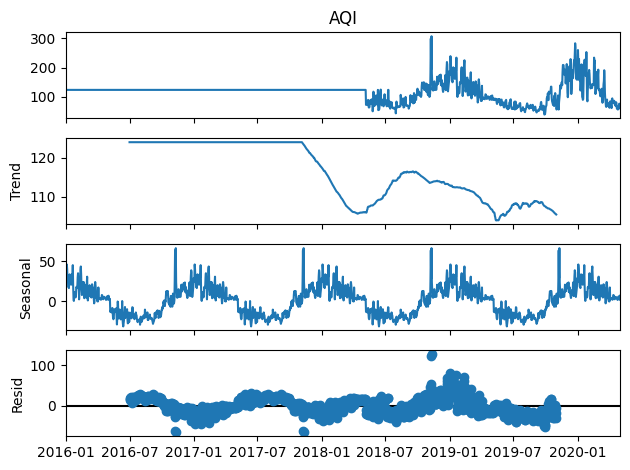

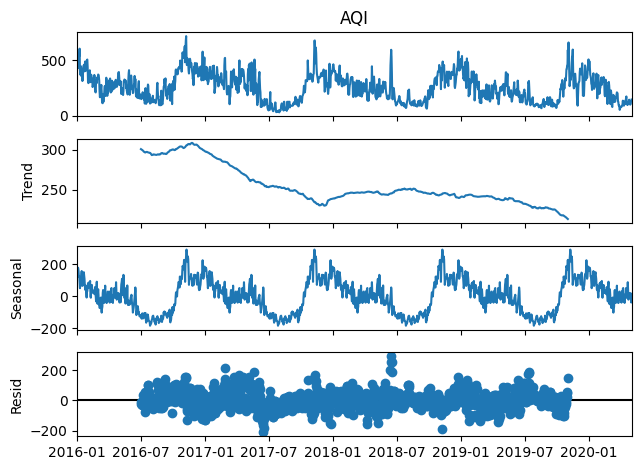

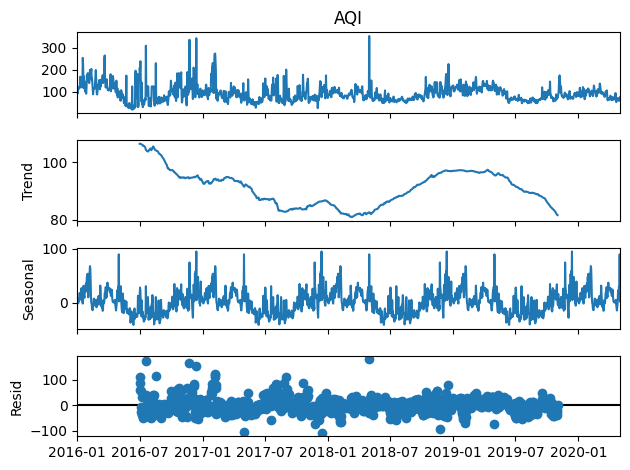

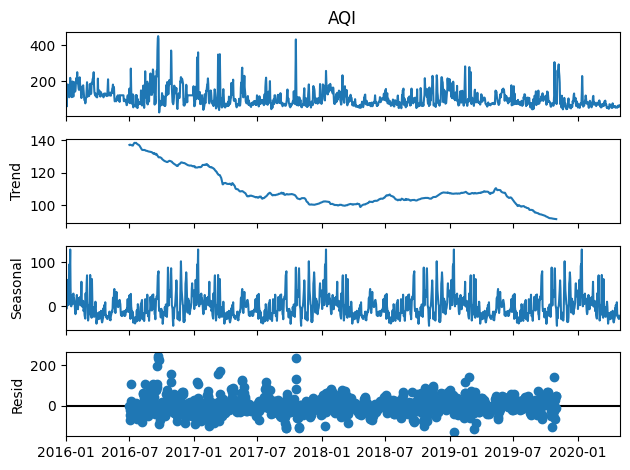

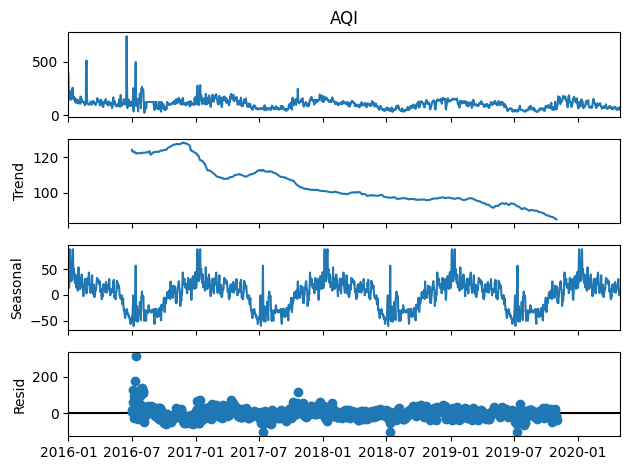

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Mumbai['AQI'], model='additive', period=365)
decomposition.plot()
plt.show()

decomposition = seasonal_decompose(Delhi['AQI'], model='additive', period=365)
decomposition.plot()
plt.show()

decomposition = seasonal_decompose(Bangalore['AQI'], model='additive', period=365)
decomposition.plot()
plt.show()

decomposition = seasonal_decompose(Chennai['AQI'], model='additive', period=365)
decomposition.plot()
plt.show()

decomposition = seasonal_decompose(Hyderabad['AQI'], model='additive', period=365)
decomposition.plot()
plt.show()


In [ ]:
train_mum = Mumbai[:'2019-12-31']
test_mum = Mumbai['2020-01-01': ]

train_amd = Hyderabad[:'2019-12-31']
test_amd = Hyderabad['2020-01-01': ]

train_del = Delhi[:'2019-12-31']
test_del = Delhi['2020-01-01': ]

train_chn = Chennai[:'2019-12-31']
test_chn = Chennai['2020-01-01': ]

train_blr = Bangalore[:'2019-12-31']
test_blr = Bangalore['2020-01-01': ]

### **ARIMA MODEL**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


2020-01-01    212.785820
2020-01-02    219.270017
2020-01-03    198.325733
2020-01-04    201.131802
2020-01-05    195.912457
                 ...    
2020-04-27     92.556017
2020-04-28     96.304629
2020-04-29     97.807714
2020-04-30     97.164940
2020-05-01     86.961132
Freq: D, Name: predicted_mean, Length: 122, dtype: float64
Mean Squared Error(MSE): 516.3037534483516
Root Mean Squared Error (RMSE): 22.722318399502097


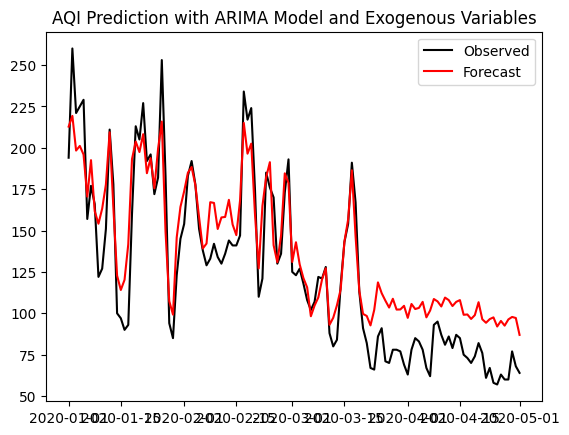

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Assume 'AQI' is the target variable, and other factors are exogenous variables
exogenous_cols = ['NO2', 'CO', 'SO2','PM2.5','O3']
endogenous_col = 'AQI'
# Fit ARIMA model
# Specify the order as (p, d, q), where p is the AR order, d is the differencing order, and q is the MA order
# Adjust these values based on the ACF and PACF plots
p = 2  # AR order
d = 1  # Differencing order (if needed)
q = 2  # MA order

# Specify the exogenous variables
exog_train = train_mum[exogenous_cols]
exog_test = test_mum[exogenous_cols]
endog_train = train_mum[endogenous_col]
endog_test = test_mum[endogenous_col]


# Fit ARIMA model with exogenous variables
model = ARIMA(train_mum['AQI'], exog=exog_train, order=(p, d, q))
results = model.fit()

# Make predictions

forecast_steps = len(test_mum)
forecast = results.get_forecast(steps=forecast_steps,exog=exog_test)
predicted_values = forecast.predicted_mean
print(predicted_values)

mse = mean_squared_error(test_mum['AQI'], predicted_values)
print(f"Mean Squared Error(MSE): {mse}")
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Plot results
plt.plot(test_mum.index, endog_test, label='Observed', color='black')
plt.plot(predicted_values.index, predicted_values, label='Forecast', color='red')
plt.legend()
plt.title('AQI Prediction with ARIMA Model and Exogenous Variables')
plt.show()


### **XG BOOST**

In [ ]:
import xgboost as xgb

In [ ]:
FEATURES = ['PM2.5','NO','NO2','NOx','NH3','CO','SO2','O3']
X_train = train_mum[FEATURES]
y_train = train_mum['AQI']

X_test = test_mum[FEATURES]
y_test = test_mum['AQI']


In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:118.85077	validation_1-rmse:134.46832
[100]	validation_0-rmse:44.75057	validation_1-rmse:55.33429
[200]	validation_0-rmse:18.29022	validation_1-rmse:28.96371


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:52:46] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:9.87601	validation_1-rmse:20.45930
[400]	validation_0-rmse:7.72830	validation_1-rmse:18.07599
[500]	validation_0-rmse:7.14900	validation_1-rmse:17.60749
[600]	validation_0-rmse:6.90495	validation_1-rmse:17.59948
[619]	validation_0-rmse:6.86986	validation_1-rmse:17.66545


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<ipython-input-21-459677925283>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_mum['prediction'] = reg.predict(X_test)


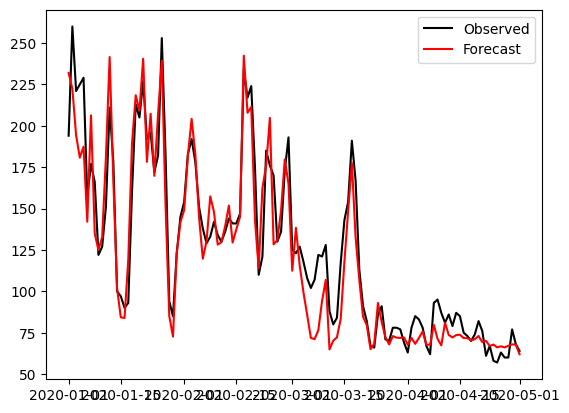

<Figure size 2500x1200 with 0 Axes>

In [ ]:
test_mum['prediction'] = reg.predict(X_test)
plt.plot(test_mum.index,test_mum['AQI'], label='Observed', color='black')
plt.plot(test_mum.index,test_mum['prediction'], label='Forecast', color='red')
plt.legend()
plt.figure(figsize=(25,12))
plt.show()

In [ ]:
score = (mean_squared_error(test_mum['AQI'], test_mum['prediction']))
rmse_sc=np.sqrt(score)
print(f'MSE Score on Test set: {score:0.2f}')
print(f'RMSE Score on Test set: {rmse_sc:0.2f}')

MSE Score on Test set: 307.90
RMSE Score on Test set: 17.55


In [ ]:
X_train = train_blr[FEATURES]
y_train = train_blr['AQI']

X_test = test_blr[FEATURES]
y_test = test_blr['AQI']

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:99.10566	validation_1-rmse:88.04370
[100]	validation_0-rmse:42.68213	validation_1-rmse:31.15499
[200]	validation_0-rmse:25.07835	validation_1-rmse:12.35273


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:52:47] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:20.40096	validation_1-rmse:8.60559
[385]	validation_0-rmse:19.03529	validation_1-rmse:8.58083


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<ipython-input-25-f3e8aac1c721>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_blr['prediction'] = reg.predict(X_test)


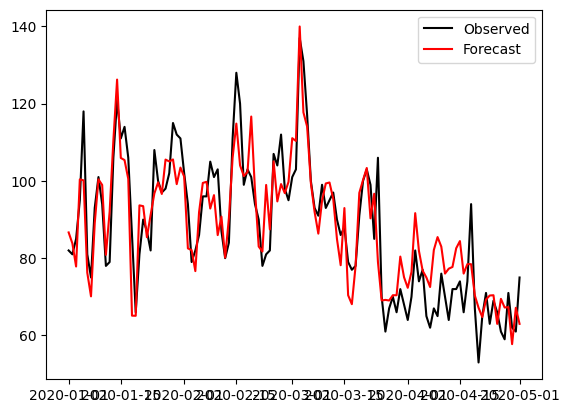

<Figure size 2500x1200 with 0 Axes>

In [ ]:
test_blr['prediction'] = reg.predict(X_test)
plt.plot(test_blr.index,test_blr['AQI'], label='Observed', color='black')
plt.plot(test_blr.index,test_blr['prediction'], label='Forecast', color='red')
plt.legend()
plt.figure(figsize=(25,12))
plt.show()

In [ ]:
score = (mean_squared_error(test_blr['AQI'], test_blr['prediction']))
rmse_sc=np.sqrt(score)
print(f'MSE Score on Test set: {score:0.2f}')
print(f'RMSE Score on Test set: {rmse_sc:0.2f}')

MSE Score on Test set: 71.85
RMSE Score on Test set: 8.48


In [ ]:
X_train = train_del[FEATURES]
y_train = train_del['AQI']

X_test = test_del[FEATURES]
y_test = test_del['AQI']

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:284.70247	validation_1-rmse:224.50661
[100]	validation_0-rmse:111.86083	validation_1-rmse:73.99041
[200]	validation_0-rmse:54.04155	validation_1-rmse:29.49861


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:52:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:38.44319	validation_1-rmse:25.76955
[320]	validation_0-rmse:37.22999	validation_1-rmse:26.08248


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<ipython-input-29-d7f5bb35275f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_del['prediction'] = reg.predict(X_test)


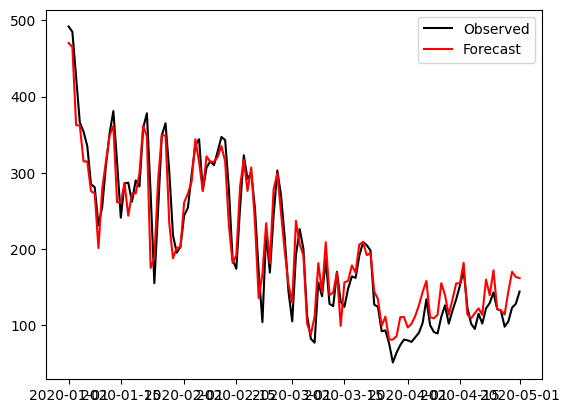

<Figure size 2500x1200 with 0 Axes>

In [ ]:
test_del['prediction'] = reg.predict(X_test)
plt.plot(test_del.index,test_del['AQI'], label='Observed', color='black')
plt.plot(test_del.index,test_del['prediction'], label='Forecast', color='red')
plt.legend()
plt.figure(figsize=(25,12))
plt.show()

In [ ]:
score = (mean_squared_error(test_del['AQI'], test_del['prediction']))
rmse_sc=np.sqrt(score)
print(f'MSE Score on Test set: {score:0.2f}')
print(f'RMSE Score on Test set: {rmse_sc:0.2f}')

MSE Score on Test set: 650.04
RMSE Score on Test set: 25.50


In [ ]:
X_train = train_chn[FEATURES]
y_train = train_chn['AQI']

X_test = test_chn[FEATURES]
y_test = test_chn['AQI']

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:121.54049	validation_1-rmse:76.75868
[100]	validation_0-rmse:51.87191	validation_1-rmse:24.48664
[200]	validation_0-rmse:30.35618	validation_1-rmse:13.98006


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:52:48] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[300]	validation_0-rmse:24.86227	validation_1-rmse:13.87341
[312]	validation_0-rmse:24.58571	validation_1-rmse:13.94995


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<ipython-input-33-e188e75a2769>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_chn['prediction'] = reg.predict(X_test)


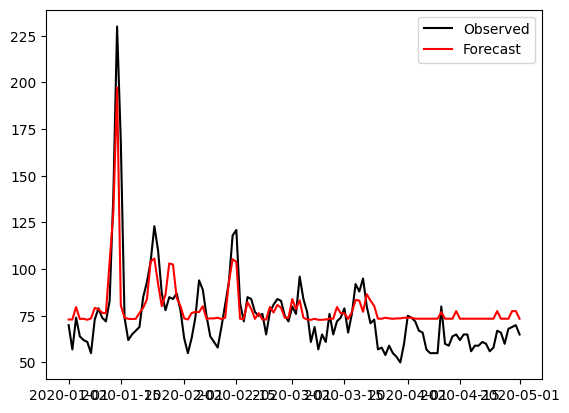

<Figure size 2500x1200 with 0 Axes>

In [ ]:
test_chn['prediction'] = reg.predict(X_test)
plt.plot(test_chn.index,test_chn['AQI'], label='Observed', color='black')
plt.plot(test_chn.index,test_chn['prediction'], label='Forecast', color='red')
plt.legend()
plt.figure(figsize=(25,12))
plt.show()

In [ ]:
score = (mean_squared_error(test_chn['AQI'], test_chn['prediction']))
rmse_sc=np.sqrt(score)
print(f'MSE Score on Test set: {score:0.2f}')
print(f'RMSE Score on Test set: {rmse_sc:0.2f}')

MSE Score on Test set: 191.24
RMSE Score on Test set: 13.83


In [ ]:
X_train = train_amd[FEATURES]
y_train = train_amd['AQI']

X_test = test_amd[FEATURES]
y_test = test_amd['AQI']

In [ ]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
reg.fit(X_train, y_train,
        eval_set=[(X_train, y_train), (X_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:115.31082	validation_1-rmse:87.77355
[100]	validation_0-rmse:47.62669	validation_1-rmse:27.20016
[200]	validation_0-rmse:25.47123	validation_1-rmse:12.47446


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [04:52:49] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


[266]	validation_0-rmse:20.46242	validation_1-rmse:12.76268


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', ...)

<ipython-input-37-f319f59f5325>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_amd['prediction'] = reg.predict(X_test)


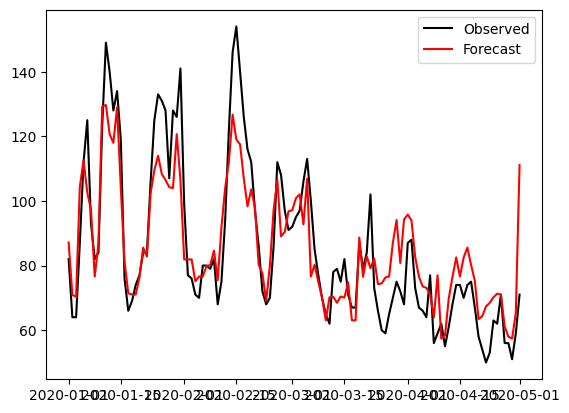

<Figure size 2500x1200 with 0 Axes>

In [ ]:
test_amd['prediction'] = reg.predict(X_test)
plt.plot(test_amd.index,test_amd['AQI'], label='Observed', color='black')
plt.plot(test_amd.index,test_amd['prediction'], label='Forecast', color='red')
plt.legend()
plt.figure(figsize=(25,12))
plt.show()


In [ ]:
score = (mean_squared_error(test_amd['AQI'], test_amd['prediction']))
rmse_sc=np.sqrt(score)
print(f'MSE Score on Test set: {score:0.2f}')
print(f'RMSE Score on Test set: {rmse_sc:0.2f}')

MSE Score on Test set: 149.70
RMSE Score on Test set: 12.24


**Predicting for the next 1 year, 3 years and 5 years respectively**

In [ ]:
prd=int(input("Enter time period for forecast- 182 days, 365 days, or 547 days : "))


Enter time period for forecast- 182 days, 365 days, or 547 days : 230


BANGALORE

FB Prophet

In [ ]:
#using prophet to predict pollutant concentrations
from prophet import Prophet
m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_blr.index
ls=list(train_blr['PM2.5'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_PM_25=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_blr.index
ls=list(train_blr['O3'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)
forecast1 = m.predict(future1)
test_O3=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_blr.index
ls=list(train_blr['CO'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_CO=pd.DataFrame(forecast1[1460::])


m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_blr.index
ls=list(train_blr['SO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_SO2=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_blr.index
ls=list(train_blr['NO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
print(future1)
test_NO2=pd.DataFrame(forecast1[1460::])


yhat_columns = {
    'NO2': test_NO2['yhat'],
    'PM_25': test_PM_25['yhat'],
    'SO2': test_SO2['yhat'],
    'CO': test_CO['yhat'],
    'O3': test_O3['yhat']
}

#creating future dataframe
future_blr = pd.concat(yhat_columns, axis=1)
future_blr.index = test_NO2['ds']
future_blr.index.rename('Date', inplace=True)
future_blr.columns = ['NO2', 'PM2.5', 'SO2', 'CO', 'O3']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/nsrqdm1z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/80zgb6ku.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67813', 'data', 'file=/tmp/tmp568ie19c/nsrqdm1z.json', 'init=/tmp/tmp568ie19c/80zgb6ku.json', 'output', 'file=/tmp/tmp568ie19c/prophet_model6ht2f_04/prophet_model-20240330045257.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:52:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:52:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56

             ds
0    2016-01-01
1    2016-01-02
2    2016-01-03
3    2016-01-04
4    2016-01-05
...         ...
1686 2020-08-13
1687 2020-08-14
1688 2020-08-15
1689 2020-08-16
1690 2020-08-17

[1691 rows x 1 columns]


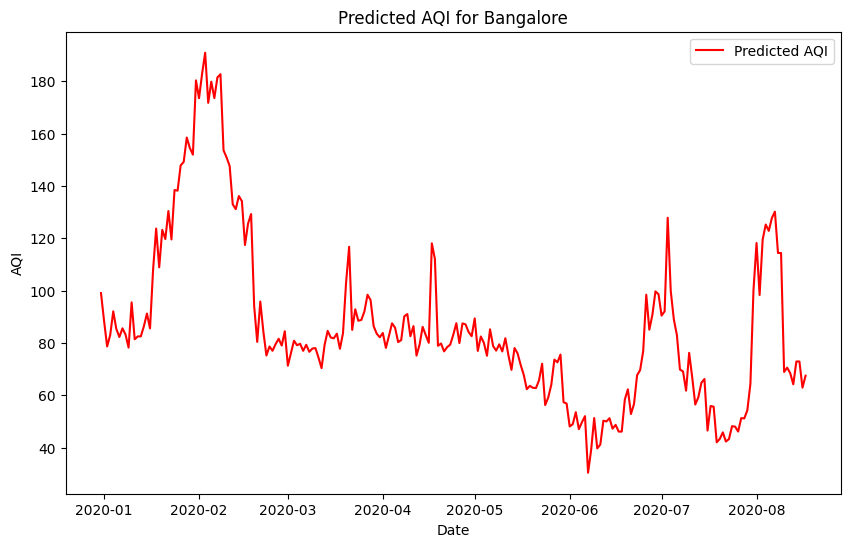

            Prediction
Date                  
2019-12-31   99.050056
2020-01-01   88.408966
2020-01-02   78.663918
2020-01-03   83.033531
2020-01-04   92.087128
...                ...
2020-08-13   64.197014
2020-08-14   72.931389
2020-08-15   72.931389
2020-08-16   62.926216
2020-08-17   67.487762

[231 rows x 1 columns]


In [ ]:
#Using xgboost to predict values
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Prepare training data
X_train = train_blr[['NO2', 'PM2.5', 'SO2', 'CO', 'O3']]  # Use historical pollutant concentrations as features
y_train = train_blr['AQI']


model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next one year using predicted pollutant concentrations (future_blr)
future_predictions = model.predict(future_blr)
plt.figure(figsize=(10, 6))
plt.plot(future_blr.index, future_predictions, label='Predicted AQI', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Predicted AQI for Bangalore')
plt.legend()
plt.show()

blr_prediction = pd.DataFrame(zip(future1['ds'][1460::], future_predictions), columns=['Date','Prediction'])
blr_prediction.set_index('Date', inplace=True)
print(blr_prediction)

CHENNAI

In [ ]:
#using prophet to predict pollutant concentrations
from prophet import Prophet
m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_chn.index
ls=list(train_chn['PM2.5'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_PM_25=pd.DataFrame(forecast1[1460::])

m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_chn.index
ls=list(train_chn['O3'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)
forecast1 = m.predict(future1)
test_O3=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_chn.index
ls=list(train_chn['CO'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_CO=pd.DataFrame(forecast1[1460::])


m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_chn.index
ls=list(train_chn['SO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_SO2=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_chn.index
ls=list(train_chn['NO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_NO2=pd.DataFrame(forecast1[1460::])


yhat_columns = {
    'NO2': test_NO2['yhat'],
    'PM_25': test_PM_25['yhat'],
    'SO2': test_SO2['yhat'],
    'CO': test_CO['yhat'],
    'O3': test_O3['yhat']
}

#creating future dataframe
future_chn = pd.concat(yhat_columns, axis=1)
future_chn.index = test_NO2['ds']
future_chn.index.rename('Date', inplace=True)
future_chn.columns = ['NO2', 'PM2.5', 'SO2', 'CO', 'O3']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/no9y9s1l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/npijftnz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=72138', 'data', 'file=/tmp/tmp568ie19c/no9y9s1l.json', 'init=/tmp/tmp568ie19c/npijftnz.json', 'output', 'file=/tmp/tmp568ie19c/prophet_modelt2cff5ji/prophet_model-20240330045301.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56

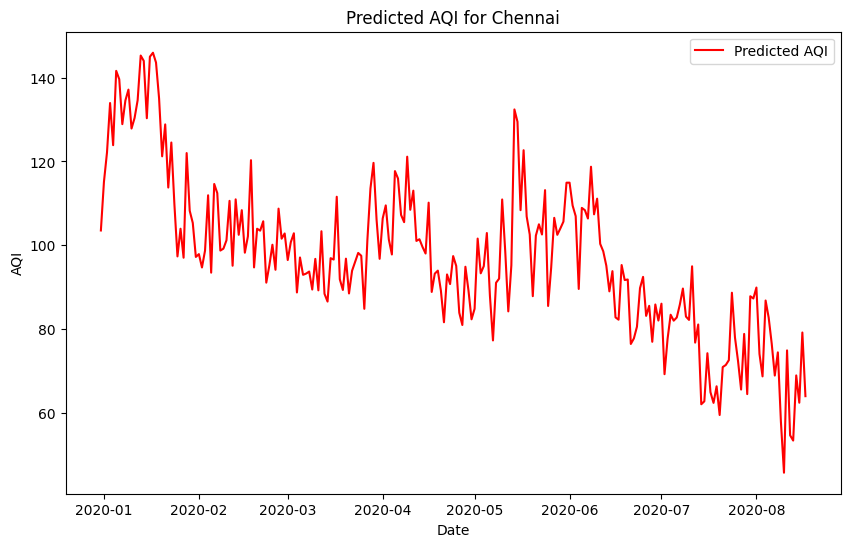

            Prediction
Date                  
2019-12-31  103.533623
2020-01-01  115.114784
2020-01-02  122.162971
2020-01-03  133.918747
2020-01-04  123.864616
...                ...
2020-08-13   53.448025
2020-08-14   68.977928
2020-08-15   62.469181
2020-08-16   79.208687
2020-08-17   64.030624

[231 rows x 1 columns]


In [ ]:
#Using xgboost to predict values
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Prepare training data
X_train = train_chn[['NO2', 'PM2.5', 'SO2', 'CO', 'O3']]  # Use historical pollutant concentrations as features
y_train = train_chn['AQI']


model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next one year using predicted pollutant concentrations (future_blr)
future_predictions = model.predict(future_chn)

plt.figure(figsize=(10, 6))
plt.plot(future_blr.index, future_predictions, label='Predicted AQI', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Predicted AQI for Chennai')
plt.legend()
plt.show()



chn_prediction = pd.DataFrame(zip(future1['ds'][1460::], future_predictions), columns=['Date','Prediction'])
chn_prediction.set_index('Date', inplace=True)
print(chn_prediction)


DELHI

In [ ]:
#using prophet to predict pollutant concentrations
from prophet import Prophet
m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_del.index
ls=list(train_del['PM2.5'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_PM_25=pd.DataFrame(forecast1[1460::])

m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_del.index
ls=list(train_del['O3'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)
forecast1 = m.predict(future1)
test_O3=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_del.index
ls=list(train_del['CO'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_CO=pd.DataFrame(forecast1[1460::])


m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_del.index
ls=list(train_del['SO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_SO2=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_del.index
ls=list(train_del['NO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_NO2=pd.DataFrame(forecast1[1460::])


yhat_columns = {
    'NO2': test_NO2['yhat'],
    'PM_25': test_PM_25['yhat'],
    'SO2': test_SO2['yhat'],
    'CO': test_CO['yhat'],
    'O3': test_O3['yhat']
}

#creating future dataframe
future_del = pd.concat(yhat_columns, axis=1)
future_del.index = test_NO2['ds']
future_del.index.rename('Date', inplace=True)
future_del.columns = ['NO2', 'PM2.5', 'SO2', 'CO', 'O3']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/urpid5l0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/n5p1to7w.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85565', 'data', 'file=/tmp/tmp568ie19c/urpid5l0.json', 'init=/tmp/tmp568ie19c/n5p1to7w.json', 'output', 'file=/tmp/tmp568ie19c/prophet_model1t0t21wh/prophet_model-20240330045307.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56

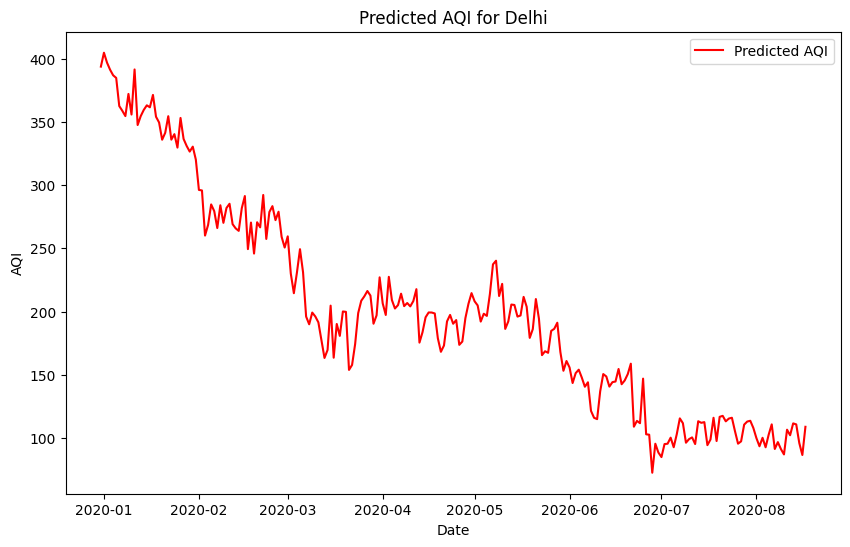

            Prediction
Date                  
2019-12-31  393.788910
2020-01-01  404.787292
2020-01-02  396.967926
2020-01-03  391.360992
2020-01-04  386.940552
...                ...
2020-08-13  111.502831
2020-08-14  110.699928
2020-08-15   95.914314
2020-08-16   86.476425
2020-08-17  108.800995

[231 rows x 1 columns]


In [ ]:
#Using xgboost to predict values
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Prepare training data
X_train = train_del[['NO2', 'PM2.5', 'SO2', 'CO', 'O3']]  # Use historical pollutant concentrations as features
y_train = train_del['AQI']


model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next one year using predicted pollutant concentrations (future_blr)
future_predictions = model.predict(future_del)
plt.figure(figsize=(10, 6))
plt.plot(future_blr.index, future_predictions, label='Predicted AQI', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Predicted AQI for Delhi')
plt.legend()
plt.show()


del_prediction = pd.DataFrame(zip(future1['ds'][1460::], future_predictions), columns=['Date','Prediction'])
del_prediction.set_index('Date', inplace=True)
print(del_prediction)

MUMBAI

In [ ]:
#using prophet to predict pollutant concentrations
from prophet import Prophet
m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_mum.index
ls=list(train_mum['PM2.5'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_PM_25=pd.DataFrame(forecast1[1460::])

m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_mum.index
ls=list(train_mum['O3'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)
forecast1 = m.predict(future1)
test_O3=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_mum.index
ls=list(train_mum['CO'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_CO=pd.DataFrame(forecast1[1460::])


m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_mum.index
ls=list(train_mum['SO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_SO2=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_mum.index
ls=list(train_mum['NO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_NO2=pd.DataFrame(forecast1[1460::])


yhat_columns = {
    'NO2': test_NO2['yhat'],
    'PM_25': test_PM_25['yhat'],
    'SO2': test_SO2['yhat'],
    'CO': test_CO['yhat'],
    'O3': test_O3['yhat']
}

#creating future dataframe
future_mum = pd.concat(yhat_columns, axis=1)
future_mum.index = test_NO2['ds']
future_mum.index.rename('Date', inplace=True)
future_mum.columns = ['NO2', 'PM2.5', 'SO2', 'CO', 'O3']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/bh9izd9h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/2zhnn09r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=74910', 'data', 'file=/tmp/tmp568ie19c/bh9izd9h.json', 'init=/tmp/tmp568ie19c/2zhnn09r.json', 'output', 'file=/tmp/tmp568ie19c/prophet_modelugw2uct9/prophet_model-20240330045311.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56

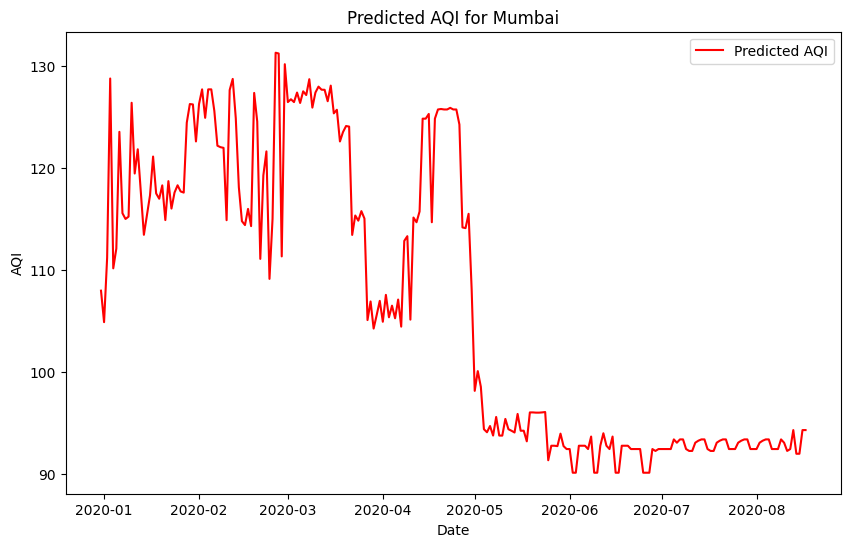

            Prediction
Date                  
2019-12-31  107.967545
2020-01-01  104.879501
2020-01-02  111.195206
2020-01-03  128.771881
2020-01-04  110.156761
...                ...
2020-08-13   94.296753
2020-08-14   91.975304
2020-08-15   91.975304
2020-08-16   94.296753
2020-08-17   94.296753

[231 rows x 1 columns]


In [ ]:
#Using xgboost to predict values
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Prepare training data
X_train = train_mum[['NO2', 'PM2.5', 'SO2', 'CO', 'O3']]  # Use historical pollutant concentrations as features
y_train = train_mum['AQI']


model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next one year using predicted pollutant concentrations (future_blr)
future_predictions = model.predict(future_mum)
plt.figure(figsize=(10, 6))
plt.plot(future_blr.index, future_predictions, label='Predicted AQI', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Predicted AQI for Mumbai')
plt.legend()
plt.show()

mum_prediction = pd.DataFrame(zip(future1['ds'][1460::], future_predictions), columns=['Date','Prediction'])
mum_prediction.set_index('Date', inplace=True)
print(mum_prediction)


KOLKATA

In [ ]:
#using prophet to predict pollutant concentrations
from prophet import Prophet
m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_amd.index
ls=list(train_amd['PM2.5'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_PM_25=pd.DataFrame(forecast1[1460::])

m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_amd.index
ls=list(train_amd['O3'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)
forecast1 = m.predict(future1)
test_O3=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_amd.index
ls=list(train_amd['CO'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_CO=pd.DataFrame(forecast1[1460::])


m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_amd.index
ls=list(train_amd['SO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_SO2=pd.DataFrame(forecast1[1460::])



m = Prophet()
df2=pd.DataFrame()
df2['ds']=train_amd.index
ls=list(train_amd['NO2'])
df2.insert(1, "y", ls, allow_duplicates = True)
m.fit(df2)
future1 = m.make_future_dataframe(periods=prd)

forecast1 = m.predict(future1)
test_NO2=pd.DataFrame(forecast1[1460::])


yhat_columns = {
    'NO2': test_NO2['yhat'],
    'PM_25': test_PM_25['yhat'],
    'SO2': test_SO2['yhat'],
    'CO': test_CO['yhat'],
    'O3': test_O3['yhat']
}

#creating future dataframe
future_amd = pd.concat(yhat_columns, axis=1)
future_amd.index = test_NO2['ds']
future_amd.index.rename('Date', inplace=True)
future_amd.columns = ['NO2', 'PM2.5', 'SO2', 'CO', 'O3']

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/7rh6bzhp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp568ie19c/symidl_8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=58811', 'data', 'file=/tmp/tmp568ie19c/7rh6bzhp.json', 'init=/tmp/tmp568ie19c/symidl_8.json', 'output', 'file=/tmp/tmp568ie19c/prophet_model5jiggdai/prophet_model-20240330045315.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
04:53:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:53:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp56

             PM2.5     NO    NO2    NOx    NH3    CO    SO2     O3    AQI
Date                                                                     
2016-01-01  232.83  11.17  17.35  26.85  10.58  1.45   8.56  27.64  387.0
2016-01-02   71.44   8.97  16.60  23.98  10.46  1.15   8.39  38.01  211.0
2016-01-03   66.92  10.65  15.35  24.45  10.35  1.23   7.77  35.08  145.0
2016-01-04  134.61   9.99  15.94  24.34  10.52  1.27   9.82  34.33  177.0
2016-01-05   80.83   9.04  16.65  24.06  10.55  1.21   8.87  34.37  218.0
...            ...    ...    ...    ...    ...   ...    ...    ...    ...
2019-12-27   56.30  10.23  36.66  26.15  13.04  0.73   6.89  26.83  119.0
2019-12-28   73.73  10.37  39.62  28.11  13.24  0.72  14.50  31.39  130.0
2019-12-29   80.23  11.11  44.53  31.18  13.85  0.79  10.51  32.58  158.0
2019-12-30   72.02  11.10  36.32  26.86  13.41  0.81   6.71  36.01  143.0
2019-12-31   47.37   8.73  30.94  22.41  14.24  0.68   5.25  30.96  107.0

[1461 rows x 9 columns]


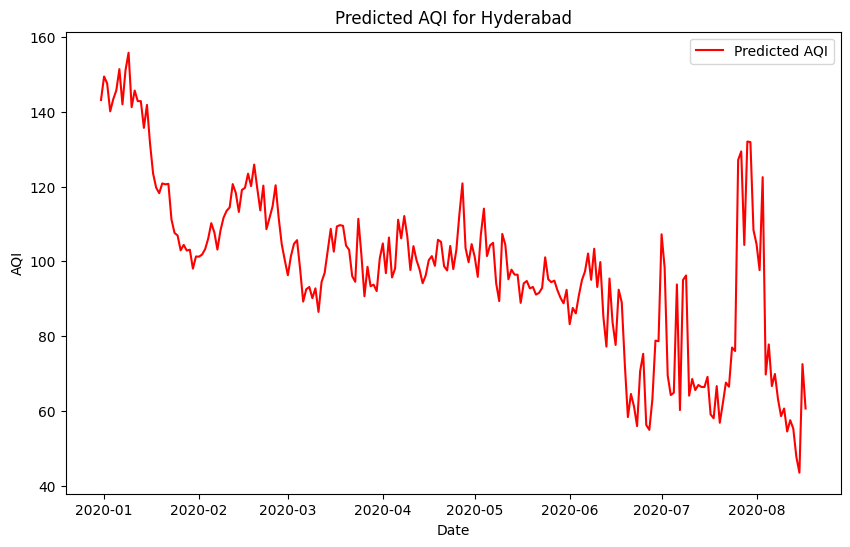

Prediction for 2020-01-01: 149.43724060058594


In [ ]:
#Using xgboost to predict values
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# Prepare training data
X_train = train_amd[['NO2', 'PM2.5', 'SO2', 'CO', 'O3']]  # Use historical pollutant concentrations as features
y_train = train_amd['AQI']
print(train_amd)

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Make predictions for the next one year using predicted pollutant concentrations (future_blr)
future_predictions = model.predict(future_amd)
plt.figure(figsize=(10, 6))
plt.plot(future_blr.index, future_predictions, label='Predicted AQI', color='red')

plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Predicted AQI for Hyderabad')
plt.legend()
plt.show()

hyd_prediction = pd.DataFrame(zip(future1['ds'][1460::], future_predictions), columns=['Date','Prediction'])
hyd_prediction.set_index('Date', inplace=True)
specific_date = '2020-01-01'  # Change this to your desired date
# Check if the specific date exists in the index
if specific_date in hyd_prediction.index:
    # Get the prediction for the specific date
    prediction_for_specific_date = hyd_prediction.loc[specific_date, 'Prediction']
    # Print the prediction for the specific date
    print(f"Prediction for {specific_date}: {prediction_for_specific_date}")
else:
    print(f"No prediction available for {specific_date}.")